In [1]:
import pandas as pd
from simulation_para import square_length, bandwidth
from _utils import plot_cdf_pdf, compare_models, compare_cdfs_ks, compare_cdfs_emd, compare_cdfs_moments, calculate_area_throughput, calculate_and_rank_percentiles

In [7]:
# load data from csv files
algo_name = "SAC"
optim_name = "SGD"
results_dir = 'results'
results_folder = f'{algo_name}-{optim_name}'

MODEL_DELTA_SE_SEs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SEs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SEv0_SEs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_SEs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SEv1_SEs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv1_SEs.csv', index_col=0)
MODEL_LOG_DELTA_SE_SEs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_SEs.csv', index_col=0)
MODEL_RELATIVE_SE_SEs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SEs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_SEs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_SEs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_SEs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_SEs.csv', index_col=0)
MODEL_DELTA_SINR_SEs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SEs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SEs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SEs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_SEs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SEs.csv', index_col=0)
MODEL_RELATIVE_SINR_SEs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SEs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SEs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SEs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SEs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SEs.csv', index_col=0)

MAXMIN_SE =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SEs.csv', index_col=0)
MAXPROD_SE = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SEs.csv', index_col=0)
SUMRATE_SE = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SEs.csv', index_col=0)

SE_DATA = {
    'MODEL_DELTA_SE_SEs':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_SEs,                 'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SEv0_SEs':    {'label': 'DRL [EXP DELTA SEv0]',       'data': MODEL_EXP_DELTA_CLIP_SEv0_SEs,      'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SEv1_SEs':    {'label': 'DRL [EXP DELTA SEv1]',       'data': MODEL_EXP_DELTA_CLIP_SEv1_SEs,      'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'MODEL_LOG_DELTA_SE_SEs':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_SEs,             'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'MODEL_RELATIVE_SE_SEs':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_SEs,              'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_SEs':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_SEs,     'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_SEs':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_SEs,          'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'MODEL_DELTA_SINR_SEs':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_SEs,               'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_SEs':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_SEs,      'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_SEs':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_SEs,           'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'MODEL_RELATIVE_SINR_SEs':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_SEs,            'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_SEs': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_SEs,   'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_SEs':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_SEs,        'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'MAXMIN_SE':                        {'label': 'MAX-MIN',                    'data': MAXMIN_SE,                          'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'MAXPROD_SE':                       {'label': 'MAX-PROD',                   'data': MAXPROD_SE,                         'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'SUMRATE_SE':                       {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SE,                         'color': 'green', 'linestyle': '-', 'linewidth': 1},
}

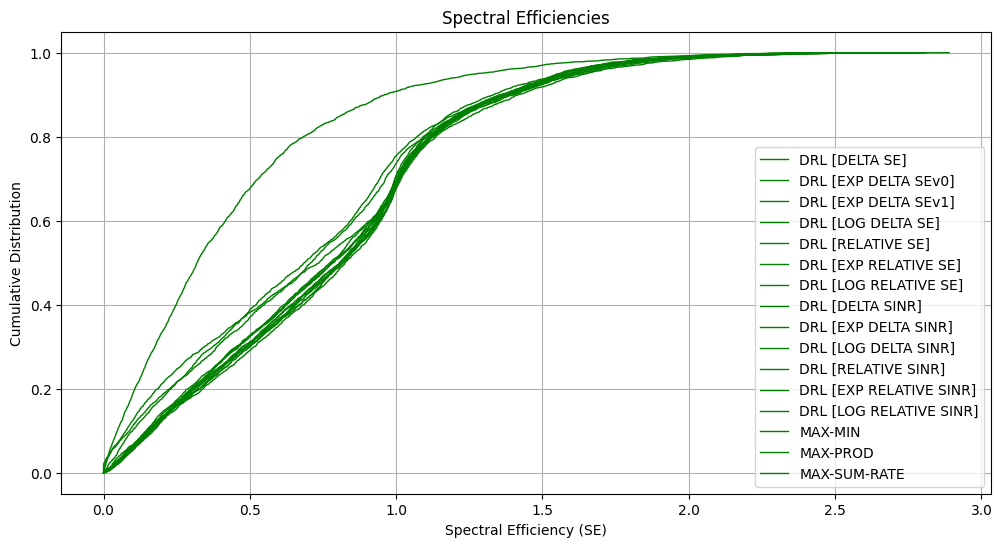

In [8]:
plot_cdf_pdf(data=SE_DATA, title='Spectral Efficiencies', xlabel='Spectral Efficiency (SE)', operation=None, cumulative=True)

In [177]:
comparison_result = compare_models(SE_DATA, operation='max')
print(comparison_result)

                                           Label Average SE    Max SE  \
Model_ch_cap_SEs    DRL Model [Channel Capacity]   1.693758  3.349482   
Model_geo_mean_SEs          DRL Model [Geo Mean]   1.692477  3.226898   
Model_mean_SEs                  DRL Model [Mean]   1.682813  3.249886   
Model_min_SEs                    DRL Model [Min]   1.688719  3.353981   
Model_sum_SEs                    DRL Model [Sum]   1.686599  3.446782   
maxmin_se                                Max-Min   1.674113  4.011695   
maxprod_se                           Max-Product   1.862449  3.855537   
sumrate_se                          Max-Sum-Rate   1.872003  3.459349   

                   Standard Deviation 25th Percentile 50th Percentile  \
Model_ch_cap_SEs             0.324582        1.465089        1.660419   
Model_geo_mean_SEs           0.322497        1.460585        1.662052   
Model_mean_SEs               0.320622         1.45318        1.650864   
Model_min_SEs                0.321864        1.461

In [178]:
compare_cdfs_ks(SE_DATA, operation='max')['Best Model']

{'Best Model by KS Statistic': 'DRL Model [Channel Capacity]',
 'Best Model by P-Value': 'DRL Model [Channel Capacity]',
 'Best Model by Area': 'DRL Model [Channel Capacity]'}

In [179]:
compare_cdfs_emd(SE_DATA, operation='max')['Ranked Models']

'Rank 1: DRL Model [Geo Mean], Rank 2: DRL Model [Mean], Rank 3: DRL Model [Min], Rank 4: DRL Model [Channel Capacity], Rank 5: DRL Model [Sum], Rank 6: Max-Product, Rank 7: Max-Sum-Rate, Rank 8: Max-Min'

In [180]:
compare_cdfs_moments(SE_DATA, operation='min')['Ranked Models']

'Rank 1: Model_mean_SEs, Rank 2: Model_ch_cap_SEs, Rank 3: Model_sum_SEs, Rank 4: maxprod_se, Rank 5: Model_min_SEs, Rank 6: Model_geo_mean_SEs, Rank 7: sumrate_se, Rank 8: maxmin_se'

In [181]:
df1 = pd.read_csv(f'{results_dir}/{results_folder}/Model_ch_cap_SEs.csv', index_col=0)
df2 = pd.read_csv(f'{results_dir}/{results_folder}/Model_geo_mean_SEs.csv', index_col=0)
df3 = pd.read_csv(f'{results_dir}/{results_folder}/Model_mean_SEs.csv', index_col=0)
df4 = pd.read_csv(f'{results_dir}/{results_folder}/Model_min_SEs.csv', index_col=0)
df5 = pd.read_csv(f'{results_dir}/{results_folder}/Model_sum_SEs.csv', index_col=0)
df6 = pd.read_csv(f'{results_dir}/{results_folder}/maxmin_SEs.csv', index_col=0)
df7 = pd.read_csv(f'{results_dir}/{results_folder}/maxprod_SEs.csv', index_col=0)
df8 = pd.read_csv(f'{results_dir}/{results_folder}/sumrate_SEs.csv', index_col=0)

In [182]:
df1 = calculate_area_throughput(df1, bandwidth, square_length, 'numpy')
df2 = calculate_area_throughput(df2, bandwidth, square_length, 'numpy')
df3 = calculate_area_throughput(df3, bandwidth, square_length, 'numpy')
df4 = calculate_area_throughput(df4, bandwidth, square_length, 'numpy')
df5 = calculate_area_throughput(df5, bandwidth, square_length, 'numpy')
df6 = calculate_area_throughput(df6, bandwidth, square_length, 'numpy')
df7 = calculate_area_throughput(df7, bandwidth, square_length, 'numpy')
df8 = calculate_area_throughput(df8, bandwidth, square_length, 'numpy')

In [183]:
ATHP_data = {
    'Model_ch_cap_SEs':     {'label': 'DRL Model [Channel Capacity]',   'data': df1, 'color': 'green', 'linestyle': ':', 'linewidth': 1},
    'Model_geo_mean_SEs':   {'label': 'DRL Model [Geo Mean]',           'data': df2, 'color': 'black', 'linestyle': ':', 'linewidth': 1},
    'Model_mean_SEs':       {'label': 'DRL Model [Mean]',               'data': df3, 'color': 'yellow', 'linestyle': ':', 'linewidth': 1},
    'Model_min_SEs':        {'label': 'DRL Model [Min]',                'data': df4, 'color': 'black', 'linestyle': '-', 'linewidth': 2},
    'Model_sum_SEs':        {'label': 'DRL Model [Sum]',                'data': df5, 'color': 'magenta', 'linestyle': ':', 'linewidth': 1},
    'maxmin_se':            {'label': 'Max-Min',                        'data': df6, 'color': 'blue', 'linestyle': ':', 'linewidth': 2},
    'maxprod_se':           {'label': 'Max-Product',                    'data': df7, 'color': 'yellow', 'linestyle': '-', 'linewidth': 2},
    'sumrate_se':           {'label': 'Max-Sum-Rate',                   'data': df8, 'color': 'green', 'linestyle': ':', 'linewidth': 2},
}

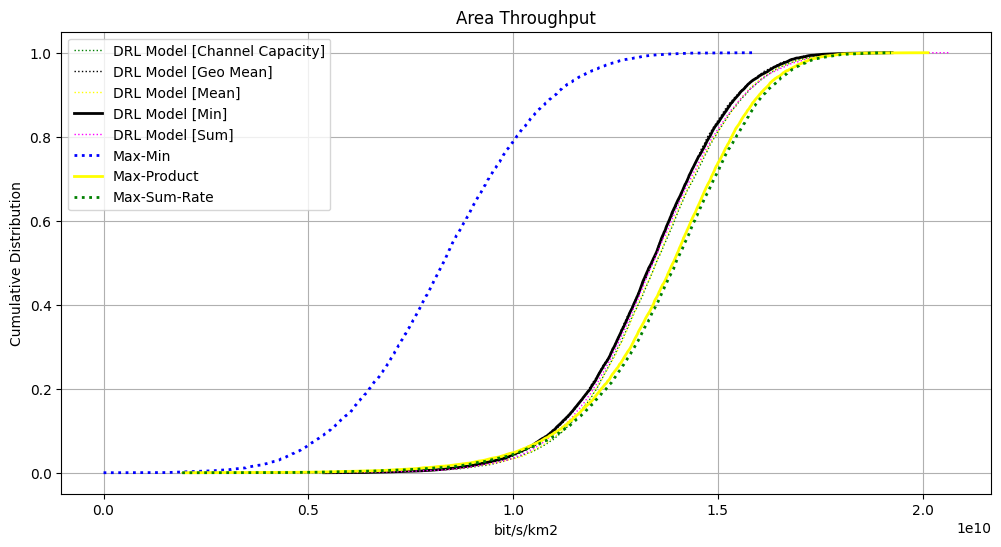

In [184]:
plot_cdf_pdf(data=ATHP_data, title='Area Throughput', xlabel='bit/s/km2', operation=None, cumulative=True)

In [185]:
data_set = {
    'Model_ch_cap_SEs': df1,
    'Model_geo_mean_SEs': df2,
    'Model_mean_SEs': df3,
    'Model_min_SEs': df4,
    'Model_sum_SEs': df5,
    'maxmin_se': df6,
    'maxprod_se': df7,
    'sumrate_se': df8,
}
calculate_and_rank_percentiles(data_set, [50, 90])

{'sumrate_se': {'50th Percentile': 13971135064.3293,
  '90th Percentile': 16119281015.084578,
  'Rank': 1},
 'maxprod_se': {'50th Percentile': 13907272851.217773,
  '90th Percentile': 16014843930.742922,
  'Rank': 2},
 'Model_ch_cap_SEs': {'50th Percentile': 13492811693.47623,
  '90th Percentile': 15670006086.011745,
  'Rank': 3},
 'Model_sum_SEs': {'50th Percentile': 13421987464.534008,
  '90th Percentile': 15647067191.420424,
  'Rank': 4},
 'Model_mean_SEs': {'50th Percentile': 13496950975.636303,
  '90th Percentile': 15642898331.768232,
  'Rank': 5},
 'Model_min_SEs': {'50th Percentile': 13380409859.948875,
  '90th Percentile': 15503740432.32888,
  'Rank': 6},
 'Model_geo_mean_SEs': {'50th Percentile': 13395942595.465641,
  '90th Percentile': 15474246676.79912,
  'Rank': 7},
 'maxmin_se': {'50th Percentile': 8294757466.4393835,
  '90th Percentile': 11032205055.842947,
  'Rank': 8}}

In [186]:
# load data from csv files
algo_name = "SAC"
optim_name = "Adam"
results_dir = 'results'
results_folder = f'{algo_name}-{optim_name}'

adam_data = {
    'Model_ch_cap_SEs':     {'label': 'DRL Model [Channel Capacity]',   'data': pd.read_csv(f'{results_dir}/{results_folder}/Model_ch_cap_SEs.csv',     index_col=0), 'color': 'green', 'linestyle': ':', 'linewidth': 3},
    'Model_geo_mean_SEs':   {'label': 'DRL Model [Geo Mean]',           'data': pd.read_csv(f'{results_dir}/{results_folder}/Model_geo_mean_SEs.csv',   index_col=0), 'color': 'black', 'linestyle': ':', 'linewidth': 3},
    'Model_mean_SEs':       {'label': 'DRL Model [Mean]',               'data': pd.read_csv(f'{results_dir}/{results_folder}/Model_mean_SEs.csv',       index_col=0), 'color': 'yellow', 'linestyle': ':', 'linewidth': 3},
    'Model_min_SEs':        {'label': 'DRL Model [Min]',                'data': pd.read_csv(f'{results_dir}/{results_folder}/Model_min_SEs.csv',        index_col=0), 'color': 'red', 'linestyle': ':', 'linewidth': 3},
    'Model_sum_SEs':        {'label': 'DRL Model [Sum]',                'data': pd.read_csv(f'{results_dir}/{results_folder}/Model_sum_SEs.csv',        index_col=0), 'color': 'magenta', 'linestyle': ':', 'linewidth': 3},
    'maxmin_se':            {'label': 'Max-Min',                        'data': pd.read_csv(f'{results_dir}/{results_folder}/maxmin_SEs.csv',           index_col=0), 'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'maxprod_se':           {'label': 'Max-Product',                    'data': pd.read_csv(f'{results_dir}/{results_folder}/maxprod_SEs.csv',          index_col=0), 'color': 'yellow', 'linestyle': '-', 'linewidth': 1},
    'sumrate_se':           {'label': 'Max-Sum-Rate',                   'data': pd.read_csv(f'{results_dir}/{results_folder}/sumrate_SEs.csv',          index_col=0), 'color': 'black', 'linestyle': '-', 'linewidth': 1},
}

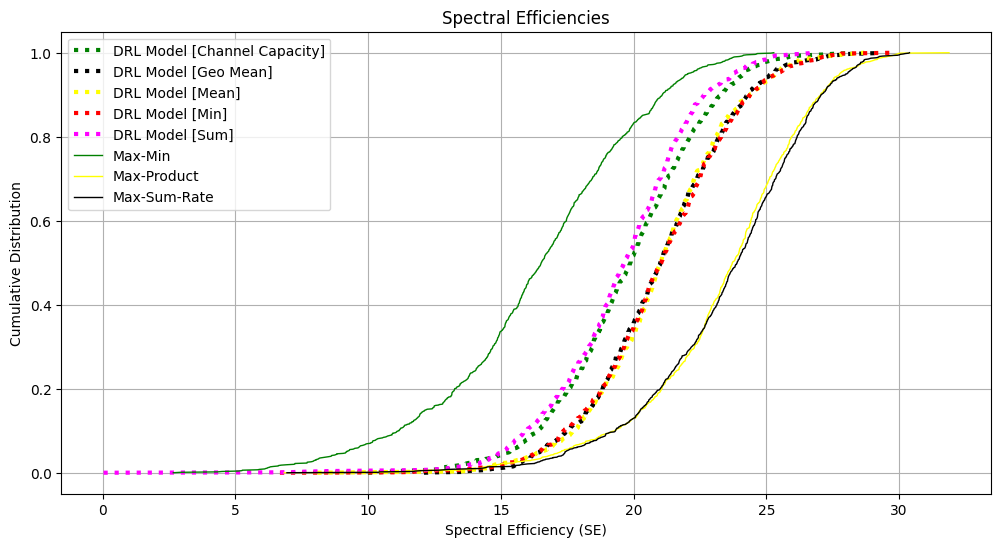

In [187]:
plot_cdf_pdf(data=adam_data, title='Spectral Efficiencies', xlabel='Spectral Efficiency (SE)', operation='sum', cumulative=True)

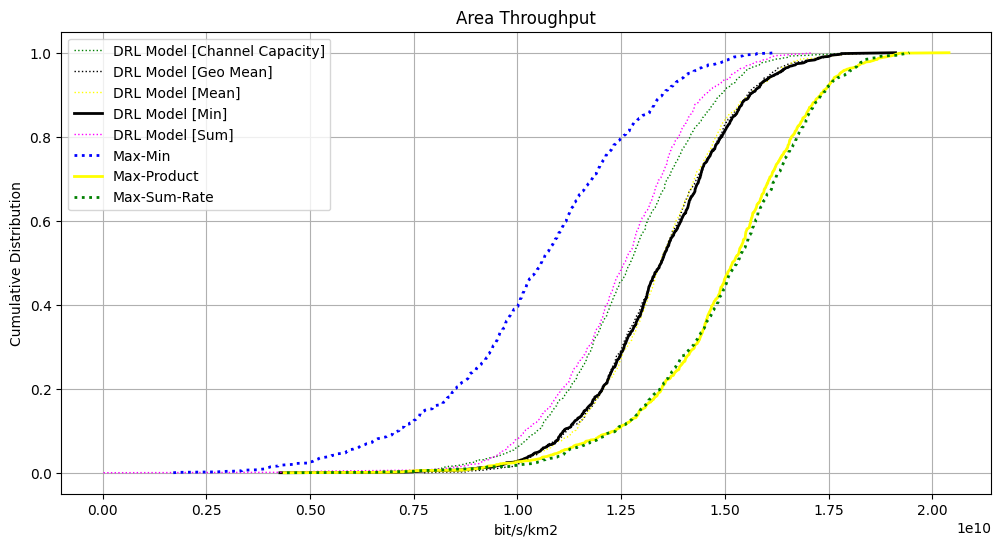

In [188]:
df1 = pd.read_csv(f'{results_dir}/{results_folder}/Model_ch_cap_SEs.csv', index_col=0)
df2 = pd.read_csv(f'{results_dir}/{results_folder}/Model_geo_mean_SEs.csv', index_col=0)
df3 = pd.read_csv(f'{results_dir}/{results_folder}/Model_mean_SEs.csv', index_col=0)
df4 = pd.read_csv(f'{results_dir}/{results_folder}/Model_min_SEs.csv', index_col=0)
df5 = pd.read_csv(f'{results_dir}/{results_folder}/Model_sum_SEs.csv', index_col=0)
df6 = pd.read_csv(f'{results_dir}/{results_folder}/maxmin_SEs.csv', index_col=0)
df7 = pd.read_csv(f'{results_dir}/{results_folder}/maxprod_SEs.csv', index_col=0)
df8 = pd.read_csv(f'{results_dir}/{results_folder}/sumrate_SEs.csv', index_col=0)

df1 = calculate_area_throughput(df1, bandwidth, square_length, 'numpy')
df2 = calculate_area_throughput(df2, bandwidth, square_length, 'numpy')
df3 = calculate_area_throughput(df3, bandwidth, square_length, 'numpy')
df4 = calculate_area_throughput(df4, bandwidth, square_length, 'numpy')
df5 = calculate_area_throughput(df5, bandwidth, square_length, 'numpy')
df6 = calculate_area_throughput(df6, bandwidth, square_length, 'numpy')
df7 = calculate_area_throughput(df7, bandwidth, square_length, 'numpy')
df8 = calculate_area_throughput(df8, bandwidth, square_length, 'numpy')

ATHP_data = {
    'Model_ch_cap_SEs':     {'label': 'DRL Model [Channel Capacity]',   'data': df1, 'color': 'green', 'linestyle': ':', 'linewidth': 1},
    'Model_geo_mean_SEs':   {'label': 'DRL Model [Geo Mean]',           'data': df2, 'color': 'black', 'linestyle': ':', 'linewidth': 1},
    'Model_mean_SEs':       {'label': 'DRL Model [Mean]',               'data': df3, 'color': 'yellow', 'linestyle': ':', 'linewidth': 1},
    'Model_min_SEs':        {'label': 'DRL Model [Min]',                'data': df4, 'color': 'black', 'linestyle': '-', 'linewidth': 2},
    'Model_sum_SEs':        {'label': 'DRL Model [Sum]',                'data': df5, 'color': 'magenta', 'linestyle': ':', 'linewidth': 1},
    'maxmin_se':            {'label': 'Max-Min',                        'data': df6, 'color': 'blue', 'linestyle': ':', 'linewidth': 2},
    'maxprod_se':           {'label': 'Max-Product',                    'data': df7, 'color': 'yellow', 'linestyle': '-', 'linewidth': 2},
    'sumrate_se':           {'label': 'Max-Sum-Rate',                   'data': df8, 'color': 'green', 'linestyle': ':', 'linewidth': 2},
}

plot_cdf_pdf(data=ATHP_data, title='Area Throughput', xlabel='bit/s/km2', operation=None, cumulative=True)

In [189]:
data_set = {
    'Model_ch_cap_SEs': df1,
    'Model_geo_mean_SEs': df2,
    'Model_mean_SEs': df3,
    'Model_min_SEs': df4,
    'Model_sum_SEs': df5,
    'maxmin_se': df6,
    'maxprod_se': df7,
    'sumrate_se': df8,
}
calculate_and_rank_percentiles(data_set, [50, 90])

{'sumrate_se': {'50th Percentile': 15296060365.548527,
  '90th Percentile': 17324223013.89494,
  'Rank': 1},
 'maxprod_se': {'50th Percentile': 15181269368.270346,
  '90th Percentile': 17314558549.243557,
  'Rank': 2},
 'Model_mean_SEs': {'50th Percentile': 13444134989.436422,
  '90th Percentile': 15607194941.247948,
  'Rank': 3},
 'Model_min_SEs': {'50th Percentile': 13468810807.072927,
  '90th Percentile': 15600899734.610172,
  'Rank': 4},
 'Model_geo_mean_SEs': {'50th Percentile': 13440903538.87995,
  '90th Percentile': 15546926136.054712,
  'Rank': 5},
 'Model_ch_cap_SEs': {'50th Percentile': 12720155994.769798,
  '90th Percentile': 14892888121.37237,
  'Rank': 6},
 'Model_sum_SEs': {'50th Percentile': 12580068562.641113,
  '90th Percentile': 14509282607.143982,
  'Rank': 7},
 'maxmin_se': {'50th Percentile': 10572105344.666714,
  '90th Percentile': 13493522365.4599,
  'Rank': 8}}

In [203]:
results_dir = 'results'
results_folder = 'SAC-SGD'
df = pd.read_csv(f'{results_dir}/{results_folder}/Model_ch_cap_powers.csv', index_col=0)

In [207]:
df.min().min()

0.0087618827819824

In [209]:
algo_name = "SAC"
optim_name = "SGD_with_cf_se"
results_dir = 'results'
results_folder = f'{algo_name}-{optim_name}'

SGD_cf_data = {
    'Model_ch_cap_SEs':     {'label': 'DRL Model [Channel Capacity]',   'data': pd.read_csv(f'{results_dir}/{results_folder}/Model_ch_cap_cf_SEs.csv',     index_col=0), 'color': 'green', 'linestyle': ':', 'linewidth': 3},
    'Model_geo_mean_SEs':   {'label': 'DRL Model [Geo Mean]',           'data': pd.read_csv(f'{results_dir}/{results_folder}/Model_geo_mean_cf_SEs.csv',   index_col=0), 'color': 'black', 'linestyle': ':', 'linewidth': 3},
    'Model_mean_SEs':       {'label': 'DRL Model [Mean]',               'data': pd.read_csv(f'{results_dir}/{results_folder}/Model_mean_cf_SEs.csv',       index_col=0), 'color': 'yellow', 'linestyle': ':', 'linewidth': 3},
    'Model_min_SEs':        {'label': 'DRL Model [Min]',                'data': pd.read_csv(f'{results_dir}/{results_folder}/Model_min_cf_SEs.csv',        index_col=0), 'color': 'red', 'linestyle': ':', 'linewidth': 3},
    'Model_sum_SEs':        {'label': 'DRL Model [Sum]',                'data': pd.read_csv(f'{results_dir}/{results_folder}/Model_sum_cf_SEs.csv',        index_col=0), 'color': 'magenta', 'linestyle': ':', 'linewidth': 3},
    'maxmin_se':            {'label': 'Max-Min',                        'data': pd.read_csv(f'{results_dir}/{results_folder}/maxmin_cf_SEs.csv',           index_col=0), 'color': 'green', 'linestyle': '-', 'linewidth': 1},
    'maxprod_se':           {'label': 'Max-Product',                    'data': pd.read_csv(f'{results_dir}/{results_folder}/maxprod_cf_SEs.csv',          index_col=0), 'color': 'yellow', 'linestyle': '-', 'linewidth': 1},
    'sumrate_se':           {'label': 'Max-Sum-Rate',                   'data': pd.read_csv(f'{results_dir}/{results_folder}/sumrate_cf_SEs.csv',          index_col=0), 'color': 'black', 'linestyle': '-', 'linewidth': 1},
}

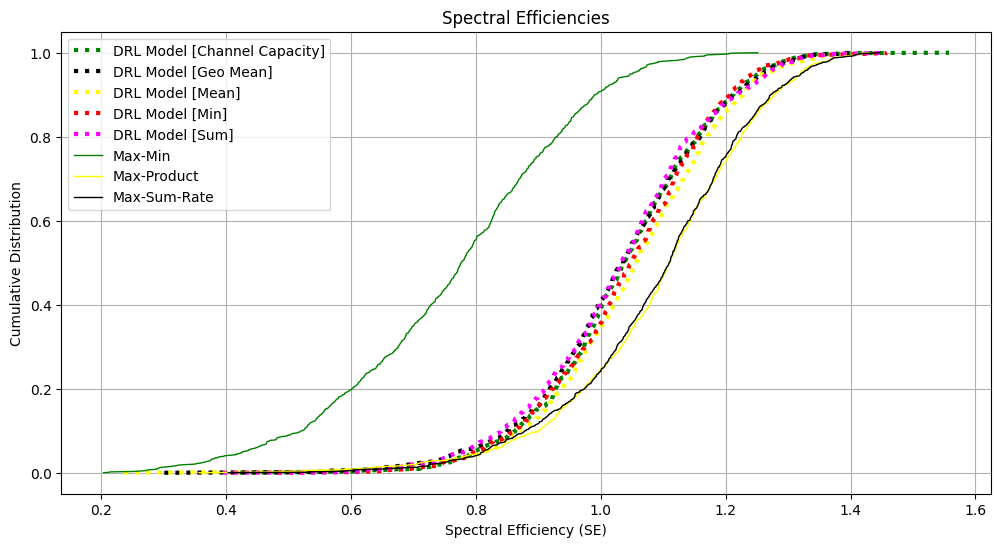

In [221]:
plot_cdf_pdf(data=SGD_cf_data, title='Spectral Efficiencies', xlabel='Spectral Efficiency (SE)', operation='sum', cumulative=True)

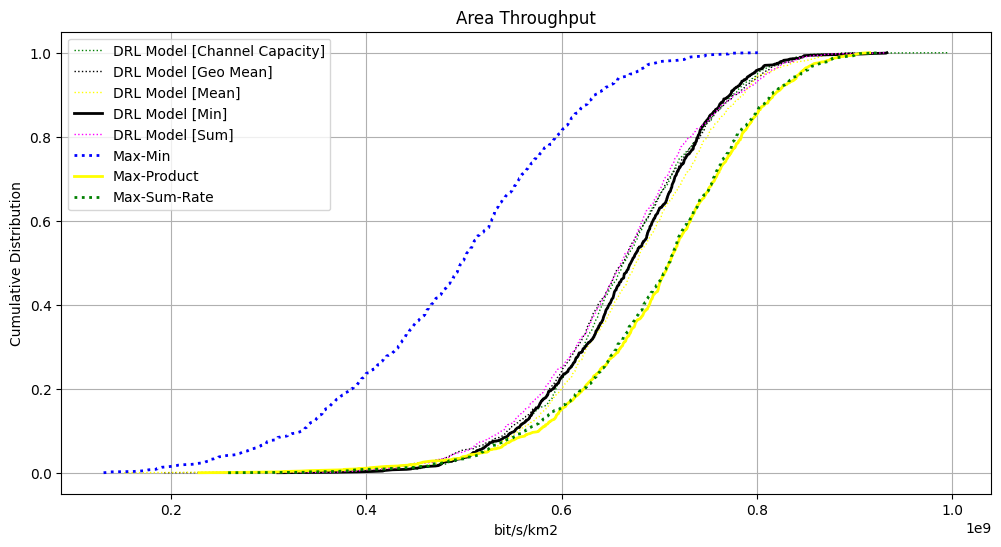

In [219]:
algo_name = "SAC"
optim_name = "SGD_with_cf_se"
results_dir = 'results'
results_folder = f'{algo_name}-{optim_name}'

df1 = pd.read_csv(f'{results_dir}/{results_folder}/Model_ch_cap_cf_SEs.csv', index_col=0)
df2 = pd.read_csv(f'{results_dir}/{results_folder}/Model_geo_mean_cf_SEs.csv', index_col=0)
df3 = pd.read_csv(f'{results_dir}/{results_folder}/Model_mean_cf_SEs.csv', index_col=0)
df4 = pd.read_csv(f'{results_dir}/{results_folder}/Model_min_cf_SEs.csv', index_col=0)
df5 = pd.read_csv(f'{results_dir}/{results_folder}/Model_sum_cf_SEs.csv', index_col=0)
df6 = pd.read_csv(f'{results_dir}/{results_folder}/maxmin_cf_SEs.csv', index_col=0)
df7 = pd.read_csv(f'{results_dir}/{results_folder}/maxprod_cf_SEs.csv', index_col=0)
df8 = pd.read_csv(f'{results_dir}/{results_folder}/sumrate_cf_SEs.csv', index_col=0)

df1 = calculate_area_throughput(df1, bandwidth, square_length, 'numpy')
df2 = calculate_area_throughput(df2, bandwidth, square_length, 'numpy')
df3 = calculate_area_throughput(df3, bandwidth, square_length, 'numpy')
df4 = calculate_area_throughput(df4, bandwidth, square_length, 'numpy')
df5 = calculate_area_throughput(df5, bandwidth, square_length, 'numpy')
df6 = calculate_area_throughput(df6, bandwidth, square_length, 'numpy')
df7 = calculate_area_throughput(df7, bandwidth, square_length, 'numpy')
df8 = calculate_area_throughput(df8, bandwidth, square_length, 'numpy')

ATHP_data = {
    'Model_ch_cap_SEs':     {'label': 'DRL Model [Channel Capacity]',   'data': df1, 'color': 'green', 'linestyle': ':', 'linewidth': 1},
    'Model_geo_mean_SEs':   {'label': 'DRL Model [Geo Mean]',           'data': df2, 'color': 'black', 'linestyle': ':', 'linewidth': 1},
    'Model_mean_SEs':       {'label': 'DRL Model [Mean]',               'data': df3, 'color': 'yellow', 'linestyle': ':', 'linewidth': 1},
    'Model_min_SEs':        {'label': 'DRL Model [Min]',                'data': df4, 'color': 'black', 'linestyle': '-', 'linewidth': 2},
    'Model_sum_SEs':        {'label': 'DRL Model [Sum]',                'data': df5, 'color': 'magenta', 'linestyle': ':', 'linewidth': 1},
    'maxmin_se':            {'label': 'Max-Min',                        'data': df6, 'color': 'blue', 'linestyle': ':', 'linewidth': 2},
    'maxprod_se':           {'label': 'Max-Product',                    'data': df7, 'color': 'yellow', 'linestyle': '-', 'linewidth': 2},
    'sumrate_se':           {'label': 'Max-Sum-Rate',                   'data': df8, 'color': 'green', 'linestyle': ':', 'linewidth': 2},
}

plot_cdf_pdf(data=ATHP_data, title='Area Throughput', xlabel='bit/s/km2', operation=None, cumulative=True)